In [1]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import statistics

%matplotlib inline  

In [2]:
pd.set_option('display.max_columns', None)  # es para enseñar todas las columnas del df

import warnings
warnings.simplefilter('ignore')

In [3]:
shark=pd.read_csv('../data/attacks.csv',encoding="latin1")

In [4]:
shark.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
nan_cols=shark.isna().sum()
nan_cols[nan_cols>0]

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [6]:
def check_nan(df):
    
    nan_cols=shark.isna().mean() * 100
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))

    sns.heatmap(df.isna(),  # mapa de calor
                yticklabels=False,
                cmap='viridis',
                cbar=False)
    
    plt.show();

'N nan cols: 24'

Case Number               66.170353
Date                      75.500525
Year                      75.508300
Type                      75.516075
Country                   75.694903
Area                      77.269370
Location                  77.599813
Activity                  77.615364
Name                      76.316915
Sex                       77.697003
Age                       86.506240
Injury                    75.609377
Fatal (Y/N)               77.595926
Time                      88.539439
Species                   86.533453
Investigator or Source    75.566614
pdf                       75.500525
href formula              75.504412
href                      75.500525
Case Number.1             75.500525
Case Number.2             75.500525
original order            75.473312
Unnamed: 22               99.996112
Unnamed: 23               99.992225
dtype: float64

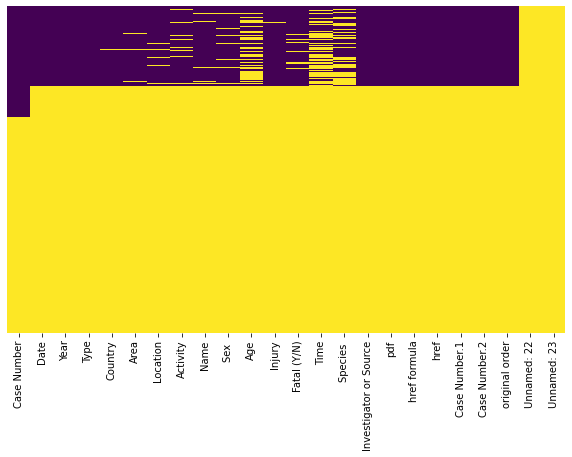

In [7]:
check_nan(shark)

In [9]:
#lista de filas en las que todos los valores son nulos

nan_rows=shark.index[shark.isnull().all(1)] 
nan_rows

Int64Index([ 8702,  8703,  8704,  8705,  8706,  8707,  8708,  8709,  8710,
             8711,
            ...
            25712, 25713, 25714, 25715, 25716, 25717, 25718, 25719, 25720,
            25721],
           dtype='int64', length=17020)

Podemos eliminar 5145 filas (hasta el 20%) 

In [14]:
rows_eliminate=[]

for i in range(5145):
    
    rows_eliminate.append(nan_rows[i])
    

In [15]:
len(rows_eliminate)

5145

In [17]:
shark.drop(rows_eliminate,axis=0,inplace=True)

In [18]:
shark.shape

(20578, 24)

Ya hemos eliminado el mayor numero de filas con todo nulos que podemos

# ELIMINANDO NULOS

In [21]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20578 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### Columnas "Unnamed"

Ambas columnas están completamente vacias por lo que las vamos a rellenar de ceros

In [22]:
shark["Unnamed: 22"]=0
shark["Unnamed: 23"]=0

### Columnas con categorias  

Las columnas que son categorias como (type, country, Area, location, Activity, Name, Sex, Age, Injury, Fatal...) las vamos a rellenar sus NAN con unknown por el momento ya que si no hay valor es que en principio no tenemos información.

In [32]:
shark[["Type","Country","Area","Location","Activity","Name","Sex ","Age","Injury","Fatal (Y/N)","Time","Species ","Investigator or Source","pdf","href formula","href"]]=shark[["Type","Country","Area","Location","Activity","Name","Sex ","Age","Injury","Fatal (Y/N)","Time","Species ","Investigator or Source","pdf","href formula","href"]].fillna("Unknown")

'N nan cols: 6'

Case Number       57.712120
Date              69.375061
Year              69.384780
Case Number.1     69.375061
Case Number.2     69.375061
original order    69.341044
dtype: float64

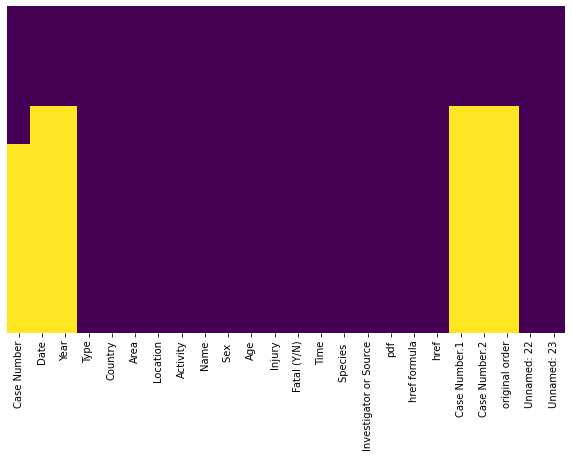

In [33]:
check_nan(shark)

### Columnas Case Number

La columna Case number son fechas, por lo que finalmente vamos a querer tenerla como date type. Antes de eliminar los nulos vamos a limpiarla de manera que solo nos queden fechas

In [34]:
shark["Case Number"]=shark["Case Number"].str.extract(r'(\d\d\d\d.\d\d.\d\d)') 

He usado Regex para seleccionar las fechas en formato yyyy.mm.dd, de esta manera los elementos del final que son i.e ND-0154 se eliminan ya que no sabemos si esos números hace referencia al año, dia, mes....

Rellenamos los nan con la última fecha disponible ya que es la mas cercana

In [36]:
shark["Case Number"]=shark["Case Number"].str.replace('.', '-')

In [37]:
shark["Case Number"]

0        2018-06-25
1        2018-06-18
2        2018-06-09
3        2018-06-08
4        2018-06-04
            ...    
25718           NaN
25719           NaN
25720           NaN
25721           NaN
25722           NaN
Name: Case Number, Length: 20578, dtype: object

In [41]:
shark.replace({"Case Number":{"00":"01","/":"-",",":"-","2014-17-28":"2014-12-28"}},inplace=True)

Cambiamos el tipo de dato da "datetime" con "errors=corerce"

In [42]:
shark["Case Number"]=pd.to_datetime(shark["Case Number"], format='%Y-%m-%d',errors = 'coerce')

Rellenamos los valores nulos con la última fecha disponible ya que será la más cercana de las que tenemos

In [43]:
shark["Case Number"].fillna(method="ffill",inplace=True)

Sobreescribimos columna Case Number.1 y 2 ya que hemos hecho:
len(shark.drop_duplicates(subset=["Case Number.1","Case Number.2"]))==len(shark) 
y hemos visto que son exactamente iguales a "Case Number"

In [44]:
shark["Case Number.1"]=shark["Case Number"]

In [45]:
shark["Case Number.2"]=shark["Case Number"]

Hacemos lo mismo con la columna "Date"

In [46]:
shark["Date"]=shark["Case Number"]

'N nan cols: 2'

Year              69.384780
original order    69.341044
dtype: float64

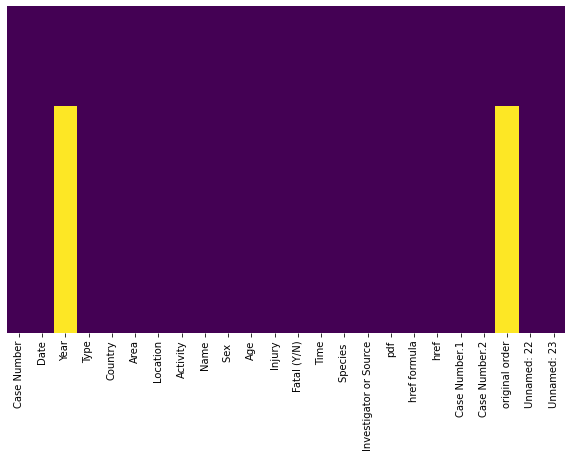

In [47]:
check_nan(shark)

### Columna "Year"

In [51]:
pd.set_option("display.max_rows",None)


Como los años van en orden, vamos a rellenar los nulos con el año equivalente a su índice en la columa Date

In [67]:
nan_rows=shark[shark['Year'].isna()].index
nan_rows

Int64Index([  187,  6079,  6302,  6303,  6304,  6305,  6306,  6307,  6308,
             6309,
            ...
            25713, 25714, 25715, 25716, 25717, 25718, 25719, 25720, 25721,
            25722],
           dtype='int64', length=14278)